In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed = 69

In [152]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"

df = pd.read_csv(uri)

df.head(5)

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [153]:
col_name = {
    'unfinished': 'nao_finalizado',
    'price': 'preco',
    'expected_hours': 'hora_esperada'
}

df = df.rename(columns=col_name)

troca = {
    0:1,
    1:0
}

df['finalizado'] = df.nao_finalizado.map(troca)

df.head(5)

,nao_finalizado,hora_esperada,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<Axes: xlabel='hora_esperada', ylabel='preco'>

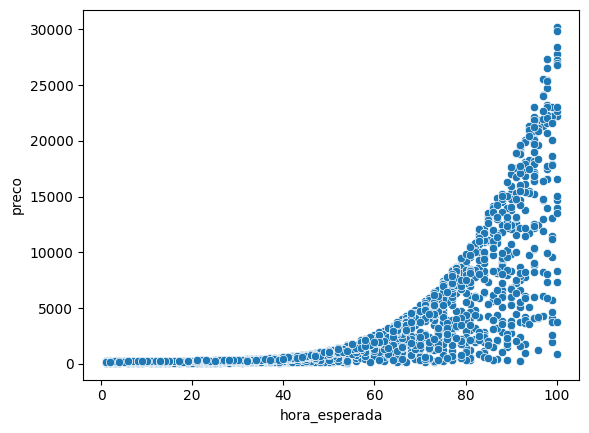

In [154]:
sns.scatterplot(x='hora_esperada', y='preco', data=df)

<Axes: xlabel='hora_esperada', ylabel='preco'>

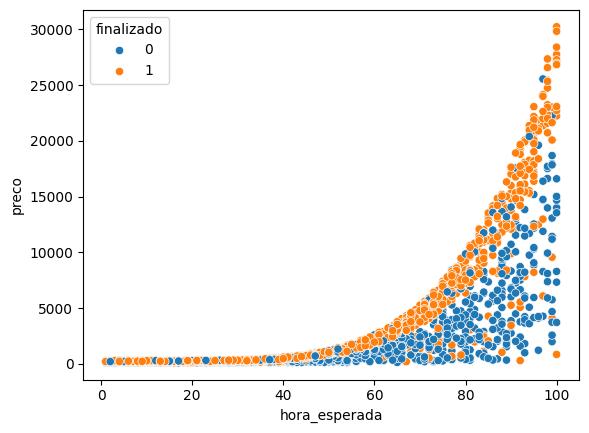

In [155]:
sns.scatterplot(x='hora_esperada', y='preco', data=df, hue='finalizado')

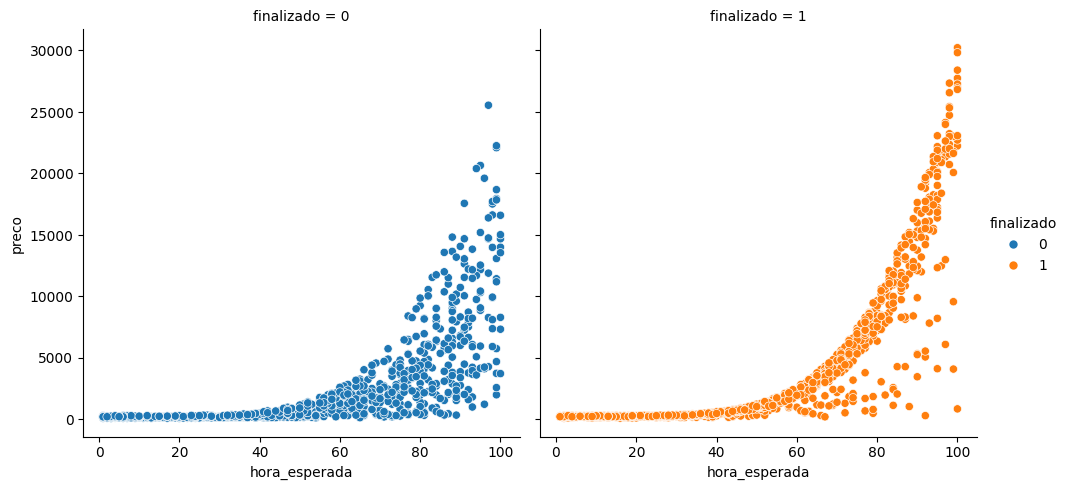

In [156]:
sns.relplot(x='hora_esperada', y='preco', data=df,col='finalizado', hue='finalizado')

In [157]:
X = df[['hora_esperada', 'preco']]
y = df['finalizado']

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(X, y, test_size=0.25, stratify=y)

In [158]:
model = SVC()

model.fit(raw_treino_x, treino_y)

previsoes = model.predict(raw_teste_x)

# Taxa de acerto.
accuracy_score(teste_y, previsoes)

0.5685185185185185

<Axes: xlabel='hora_esperada', ylabel='preco'>

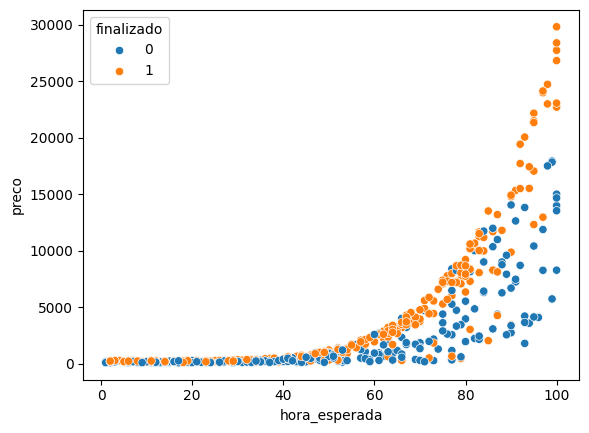

In [159]:
sns.scatterplot(x='hora_esperada', y='preco', data=raw_teste_x, hue=teste_y)

In [160]:
x_min = raw_teste_x.hora_esperada.min()
x_max = raw_teste_x.hora_esperada.max()

y_min = raw_teste_x.preco.min()
y_max = raw_teste_x.preco.max()

pixel = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixel)  
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixel)  

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

In [161]:
Z = model.predict(pontos)

Z = Z.reshape(xx.shape)

Z

c:\Users\renat\Documents\python\Machine Learning classificação com SKLearn\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

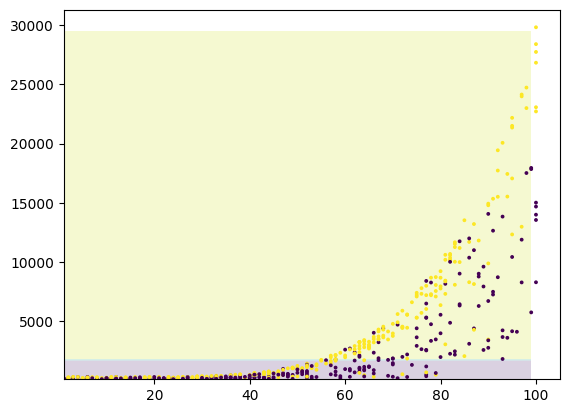

In [162]:
# Decision Boundary

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(raw_teste_x.hora_esperada, raw_teste_x.preco, c=teste_y, s=3)

In [163]:
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


In [164]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixel = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixel)  
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixel)  

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

c:\Users\renat\Documents\python\Machine Learning classificação com SKLearn\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


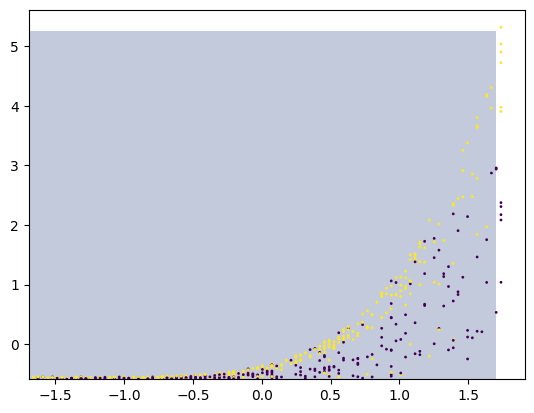

In [165]:
# Decision Boundary

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)